In [1]:
import pandas as pd
import numpy as np
from random import *

from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
players = pd.read_csv("players.csv")
players.round(1)

,First,Last,Height,Weight,T_Strength,T_Athleticism,T_Dexterity,T_IQ,T_Personality,T_Arm,T_Leg,S_ArmStr,S_ArmAccShort,S_ArmAccMed,S_ArmAccLong,S_ReadDefPass,S_ReadDefRun,S_Speed,S_Acceleration,S_Agility,S_RunPower,S_Vertical,S_Hands,S_RunBlock,S_PassBlock,S_TackApproach,S_TackBringDown,S_ShedBlockStr,S_ShedBlockAgl,S_CoverMan,S_CoverZone,S_ReadOff,S_KickPow,S_KickAcc,S_PuntPow,S_PuntAcc
0,Andrew,Villa,73.3,225.5,48.0,62.2,70.0,52.0,60.0,65.0,49.6,67.5,66.0,63.6,69.0,56.7,57.0,54.4,58.3,53.3,58.7,52.4,60.9,56.9,59.1,56.5,58.2,61.1,64.7,53.6,51.6,53.6,50.0,48.8,53.5,54.3
1,Rashaud,Martinez,70.3,170.2,17.4,80.3,50.0,36.3,66.0,44.4,62.6,47.8,54.5,46.9,45.1,37.4,44.0,71.6,62.1,65.5,32.3,57.9,52.8,34.0,31.0,57.9,26.6,35.7,57.4,71.8,63.9,40.6,66.2,61.1,64.3,52.6
2,Nathaniel,Davis,71.8,202.8,22.5,64.8,46.8,69.9,44.5,67.8,24.4,64.4,67.2,59.0,64.4,62.0,72.7,54.2,52.5,52.8,39.5,43.7,33.7,28.9,36.4,53.6,36.3,35.6,30.9,57.3,52.2,69.1,30.8,42.2,32.9,36.7
3,Austin,Hudson,73.7,229.7,39.5,57.1,40.5,59.8,31.8,54.7,31.9,54.7,51.7,53.0,58.1,59.0,66.6,48.7,41.9,44.1,50.1,52.3,32.0,49.8,47.6,47.1,42.9,55.3,42.4,44.2,42.5,58.9,39.6,37.6,41.3,52.9
4,Jonathan,Dickerson,70.1,173.2,42.6,59.7,90.6,57.7,47.6,21.7,49.0,32.1,32.8,31.8,33.7,53.0,45.9,51.6,49.1,58.2,55.3,40.1,75.1,44.4,49.1,48.8,51.9,43.5,53.4,57.9,58.8,48.3,54.3,60.2,55.4,71.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,James,Villegas,73.5,260.1,68.5,43.0,28.5,14.7,69.3,56.8,25.0,65.1,60.4,53.5,62.8,20.8,23.3,34.4,37.4,30.7,75.4,40.9,33.5,73.2,74.1,43.2,69.8,76.5,42.9,36.9,19.1,21.4,32.4,59.7,31.4,28.9
24996,Charles,Mclaughlin,75.2,215.7,41.4,49.8,60.8,69.0,33.7,27.7,49.2,36.6,31.2,32.2,34.0,70.7,68.6,40.9,38.8,37.7,48.4,59.8,53.8,51.6,49.0,50.3,45.7,54.5,41.2,45.5,40.7,66.7,52.6,36.2,56.1,50.3
24997,Christopher,Warren,74.2,189.6,33.1,63.8,78.3,62.4,37.3,47.5,67.5,49.0,52.8,53.8,51.3,63.9,62.5,54.4,56.7,50.7,41.5,54.5,55.0,41.5,42.5,53.7,46.1,46.3,56.2,59.8,58.4,53.6,70.9,50.5,64.9,49.2
24998,Cameron,Hill,75.3,248.7,42.7,34.3,58.0,29.2,38.8,31.1,46.9,38.2,40.2,44.2,36.8,31.9,30.9,29.6,24.3,23.6,42.3,43.4,54.8,50.1,53.6,26.1,45.5,47.8,30.6,22.2,29.7,32.9,47.4,51.1,50.4,43.3


# Prospect Scores

In [3]:
PRINT = 20

### QB_PP

In [4]:
players["P_QB_PP"] = 0.25*players["S_ArmStr"] + 0.25*players["S_ArmAccShort"] + 0.2*players["S_ArmAccMed"] + 0.1*players["S_ArmAccLong"] + 0.2*players["S_ReadDefPass"]

players.sort_values(by="P_QB_PP", ascending=False).round(1).head(PRINT)

,First,Last,Height,Weight,T_Strength,T_Athleticism,T_Dexterity,T_IQ,T_Personality,T_Arm,T_Leg,S_ArmStr,S_ArmAccShort,S_ArmAccMed,S_ArmAccLong,S_ReadDefPass,S_ReadDefRun,S_Speed,S_Acceleration,S_Agility,S_RunPower,S_Vertical,S_Hands,S_RunBlock,S_PassBlock,S_TackApproach,S_TackBringDown,S_ShedBlockStr,S_ShedBlockAgl,S_CoverMan,S_CoverZone,S_ReadOff,S_KickPow,S_KickAcc,S_PuntPow,S_PuntAcc,P_QB_PP
12533,Nikolas,Huber,74.1,195.7,49.2,54.9,73.0,62.9,62.5,97.2,43.4,94.0,91.9,93.9,94.5,66.8,68.7,48.4,50.7,43.3,62.3,51.9,57.7,57.7,62.3,58.1,50.8,61.8,46.0,48.1,59.1,59.0,51.1,46.3,49.5,33.0,88.1
8158,Nathaniel,Howe,76.0,241.7,49.4,58.0,73.1,67.2,43.1,97.4,62.3,94.8,88.3,95.1,94.6,66.8,64.8,45.7,53.5,55.3,65.1,60.7,56.7,57.8,60.7,55.3,66.5,58.3,59.1,52.8,57.2,72.9,64.0,66.8,60.5,50.1,87.6
20826,Liam,Boone,74.6,243.7,55.5,53.9,38.7,85.5,52.7,92.6,34.0,88.2,80.5,90.0,89.2,86.9,78.8,40.4,42.3,39.6,67.5,57.4,42.3,62.9,65.7,44.9,62.8,70.6,50.1,45.9,55.2,85.2,41.4,27.3,40.5,38.7,86.5
7937,Kyle,Mathis,73.4,182.6,23.1,65.0,62.7,41.8,51.4,105.3,60.9,96.9,97.3,97.9,93.6,39.1,31.9,55.0,49.5,57.6,32.8,54.6,50.1,35.4,29.7,50.0,34.6,35.0,34.9,59.4,56.7,37.8,65.0,52.5,59.3,70.8,85.3
15179,Christian,Brooks,70.2,180.5,21.7,49.5,72.4,48.9,68.0,96.6,46.1,92.8,96.7,96.1,89.2,48.7,40.7,45.2,43.6,40.3,29.0,22.7,61.4,32.9,30.3,38.0,35.3,22.0,41.5,43.3,49.0,52.3,50.3,39.5,46.7,54.8,85.2
13441,Alexander,Obrien,73.0,182.2,31.0,86.6,103.7,62.4,28.5,99.9,53.3,90.0,98.3,91.1,91.7,53.6,57.0,72.7,75.0,83.0,43.2,61.9,81.3,43.9,47.5,66.8,49.9,45.8,73.1,72.7,85.0,53.7,58.7,70.7,53.7,51.5,85.2
20963,Coleman,Murphy,74.1,227.1,50.3,56.3,74.3,55.4,42.3,99.0,21.8,96.0,88.3,89.2,96.8,57.2,63.7,47.9,44.6,47.4,52.4,50.7,52.7,58.0,55.5,42.7,58.0,52.2,54.1,54.2,53.0,62.0,32.8,60.7,33.9,62.5,85.1
14460,Drequan,Jones,73.8,196.1,28.8,61.5,99.5,79.4,59.4,85.2,43.4,82.8,89.7,87.5,85.2,78.7,68.7,56.0,61.0,56.2,34.5,47.2,73.3,41.3,42.4,50.7,37.8,43.4,42.6,54.0,67.9,84.4,50.8,39.0,46.8,42.5,84.9
7735,Jonathan,Vaughn,70.3,171.5,35.6,77.1,75.6,73.6,52.4,91.5,30.0,85.6,86.7,92.2,85.6,71.8,67.1,68.2,63.7,69.5,53.9,49.2,52.5,41.3,56.3,62.2,43.0,41.4,59.5,68.3,68.0,61.2,37.0,42.9,37.0,55.3,84.4
18114,Jonathan,Glover,71.3,176.2,46.9,72.2,78.7,50.7,48.7,93.1,10.0,88.9,91.3,95.2,87.2,51.3,44.8,65.0,64.7,67.0,51.8,55.9,56.0,48.0,61.2,59.7,58.8,60.0,69.1,67.3,69.0,46.9,23.0,31.3,23.0,34.7,83.1


### QB_DT

In [5]:
players["P_QB_DT"] = 0.1*players["S_ArmStr"] + 0.1*players["S_ArmAccShort"] + 0.1*players["S_ArmAccMed"] + 0.1*players["S_ArmAccLong"] + 0.1*players["S_ReadDefPass"] + 0.1*players["S_ReadDefRun"] + 0.1*players["S_Acceleration"] + 0.1*players["S_Agility"] + 0.1*players["S_RunPower"] + 0.1*players["S_Speed"]

players.sort_values(by="P_QB_DT", ascending=False).round(1).head(PRINT)               

,First,Last,Height,Weight,T_Strength,T_Athleticism,T_Dexterity,T_IQ,T_Personality,T_Arm,T_Leg,S_ArmStr,S_ArmAccShort,S_ArmAccMed,S_ArmAccLong,S_ReadDefPass,S_ReadDefRun,S_Speed,S_Acceleration,S_Agility,S_RunPower,S_Vertical,S_Hands,S_RunBlock,S_PassBlock,S_TackApproach,S_TackBringDown,S_ShedBlockStr,S_ShedBlockAgl,S_CoverMan,S_CoverZone,S_ReadOff,S_KickPow,S_KickAcc,S_PuntPow,S_PuntAcc,P_QB_PP,P_QB_DT
13441,Alexander,Obrien,73.0,182.2,31.0,86.6,103.7,62.4,28.5,99.9,53.3,90.0,98.3,91.1,91.7,53.6,57.0,72.7,75.0,83.0,43.2,61.9,81.3,43.9,47.5,66.8,49.9,45.8,73.1,72.7,85.0,53.7,58.7,70.7,53.7,51.5,85.2,75.6
7735,Jonathan,Vaughn,70.3,171.5,35.6,77.1,75.6,73.6,52.4,91.5,30.0,85.6,86.7,92.2,85.6,71.8,67.1,68.2,63.7,69.5,53.9,49.2,52.5,41.3,56.3,62.2,43.0,41.4,59.5,68.3,68.0,61.2,37.0,42.9,37.0,55.3,84.4,74.4
23865,Erik,Ruiz,74.1,186.3,48.1,76.6,49.6,83.9,40.5,81.4,48.7,76.5,73.6,80.1,78.7,80.7,83.7,65.0,66.2,67.1,59.9,61.9,44.8,56.5,55.3,52.6,54.2,63.6,72.3,63.2,64.2,81.0,52.4,65.6,53.7,65.5,77.6,73.2
9694,Zachary,Johnson,72.6,193.4,36.2,90.8,56.6,61.5,43.0,86.6,60.6,82.8,79.5,80.1,81.9,58.7,55.4,79.1,78.5,79.8,54.8,77.3,41.6,47.7,57.4,62.8,57.4,47.4,75.6,71.5,75.7,57.3,58.0,56.1,59.4,72.1,76.5,73.1
14523,Tyler,Cruz,70.8,170.6,33.1,86.4,63.9,62.9,55.2,85.5,61.4,83.3,76.1,86.4,79.5,57.5,66.0,74.3,77.6,78.0,51.8,56.2,60.0,44.9,46.8,62.2,52.7,50.1,73.3,75.8,71.3,63.5,63.4,44.7,66.3,73.6,76.6,73.1
2848,Marc,Rivera,70.5,172.8,48.7,88.7,96.1,62.4,85.4,66.9,58.8,71.1,72.0,78.9,75.1,66.0,65.6,76.6,78.3,78.3,63.0,50.9,69.6,56.5,59.0,75.0,62.9,59.5,82.3,84.3,84.3,67.7,59.3,71.7,60.0,56.0,72.3,72.5
8158,Nathaniel,Howe,76.0,241.7,49.4,58.0,73.1,67.2,43.1,97.4,62.3,94.8,88.3,95.1,94.6,66.8,64.8,45.7,53.5,55.3,65.1,60.7,56.7,57.8,60.7,55.3,66.5,58.3,59.1,52.8,57.2,72.9,64.0,66.8,60.5,50.1,87.6,72.4
9629,Maurice,Mason,73.4,190.3,55.2,96.2,75.0,73.6,63.7,55.0,45.0,60.3,66.0,63.1,60.8,78.6,64.5,86.8,83.1,86.0,74.7,76.3,66.8,66.6,67.3,71.7,77.2,78.5,96.9,86.5,95.1,66.5,46.2,52.7,47.2,43.4,66.0,72.4
11702,Scott,Ellis,74.3,215.7,47.9,62.6,68.9,86.9,49.7,84.3,51.4,83.9,78.7,84.6,80.7,86.3,85.8,49.9,51.0,55.1,64.5,55.6,53.4,55.2,61.8,51.5,63.0,54.4,56.2,52.7,61.7,88.7,51.3,46.1,58.0,36.5,82.9,72.0
15884,Braden,Fisher,73.8,195.4,36.4,88.4,67.9,63.5,48.2,78.0,50.8,77.2,80.6,74.2,75.1,65.6,61.9,79.3,76.7,79.5,49.2,78.7,57.2,46.9,61.5,80.7,48.4,51.7,66.0,72.1,82.1,62.2,52.1,43.0,57.0,41.9,74.9,71.9


## RB

In [6]:
players["P_RB"] = 0.3*players["S_Acceleration"] + 0.3*players["S_Speed"] + 0.15*players["S_Agility"] + 0.15*players["S_RunPower"] + 0.1*players["S_ReadDefRun"]

players.sort_values(by="P_RB", ascending=False).round(1).head(PRINT)

,First,Last,Height,Weight,T_Strength,T_Athleticism,T_Dexterity,T_IQ,T_Personality,T_Arm,T_Leg,S_ArmStr,S_ArmAccShort,S_ArmAccMed,S_ArmAccLong,S_ReadDefPass,S_ReadDefRun,S_Speed,S_Acceleration,S_Agility,S_RunPower,S_Vertical,S_Hands,S_RunBlock,S_PassBlock,S_TackApproach,S_TackBringDown,S_ShedBlockStr,S_ShedBlockAgl,S_CoverMan,S_CoverZone,S_ReadOff,S_KickPow,S_KickAcc,S_PuntPow,S_PuntAcc,P_QB_PP,P_QB_DT,P_RB
9629,Maurice,Mason,73.4,190.3,55.2,96.2,75.0,73.6,63.7,55.0,45.0,60.3,66.0,63.1,60.8,78.6,64.5,86.8,83.1,86.0,74.7,76.3,66.8,66.6,67.3,71.7,77.2,78.5,96.9,86.5,95.1,66.5,46.2,52.7,47.2,43.4,66.0,72.4,81.5
21268,Andrew,Zuniga,72.5,200.0,55.1,99.8,56.2,52.2,57.6,67.0,44.3,71.7,63.4,71.0,71.0,54.2,63.1,83.1,84.4,79.5,75.0,80.3,43.6,60.5,76.1,85.3,72.4,78.1,94.8,89.8,83.0,48.2,47.9,50.6,46.4,54.1,65.9,71.6,79.7
1396,Justo,Wilson,72.7,180.8,25.9,96.5,96.3,52.3,63.0,68.3,25.2,66.1,69.4,66.7,72.5,51.1,63.1,85.2,90.9,81.8,51.4,78.5,74.9,42.1,49.4,86.0,49.5,44.6,71.3,82.3,91.3,57.3,31.3,59.2,37.4,36.1,64.7,69.8,79.1
13744,Tristen,Garcia,73.8,190.7,54.1,94.7,65.2,48.3,54.5,36.0,37.7,44.5,48.5,40.2,46.5,51.8,55.3,81.7,82.4,85.1,73.8,80.6,47.6,63.2,75.3,74.1,71.5,63.9,96.3,83.7,70.6,54.5,46.3,46.5,46.9,38.4,46.3,61.0,78.6
9622,Matthew,Williams,72.3,178.3,32.1,97.0,109.5,66.9,56.9,47.6,61.3,53.7,61.0,63.4,56.7,68.2,65.5,82.3,87.3,89.9,50.3,77.8,74.3,36.3,51.0,93.0,57.3,48.5,76.2,93.8,92.8,70.8,58.6,71.1,65.1,62.8,60.7,67.8,78.4
9957,Caleb,Gonzalez,71.4,175.2,39.2,95.1,49.0,61.3,66.3,46.7,56.8,51.7,52.7,51.1,54.1,59.4,60.9,83.2,84.9,81.7,61.4,63.5,36.4,44.1,54.6,80.5,58.6,57.5,70.6,82.5,83.8,64.1,56.3,54.1,61.0,49.6,53.6,64.1,78.0
14901,Philip,Moore,72.7,195.5,36.0,97.0,46.9,57.0,43.3,54.5,33.2,54.5,56.8,59.2,57.4,55.2,57.5,88.6,80.5,84.7,57.4,77.7,49.6,42.4,62.9,77.0,56.0,51.8,67.6,76.3,84.1,48.3,38.7,39.6,41.6,34.8,56.4,65.2,77.8
24368,Connor,Brown,74.7,190.4,25.9,93.1,79.2,71.8,58.7,46.5,45.8,51.7,51.0,55.4,53.0,71.6,70.2,85.6,86.7,82.6,44.3,85.4,58.5,38.3,52.9,74.1,48.3,46.2,72.8,79.0,86.8,77.6,50.8,47.1,49.9,65.2,56.4,65.2,77.7
24826,Myles,Bean,69.8,165.6,32.6,95.5,73.1,53.5,59.5,53.1,37.8,58.7,59.6,55.1,59.8,54.3,56.3,84.4,82.6,85.6,57.4,65.8,64.6,39.9,44.7,85.6,53.1,48.0,68.6,81.4,82.9,52.3,44.8,51.6,43.4,33.9,57.4,65.4,77.2
14720,Dean,Smith,71.6,183.2,61.8,87.8,67.4,43.0,74.2,36.5,29.5,48.0,43.5,47.6,50.3,49.8,47.3,81.0,80.3,80.1,75.9,62.9,63.5,69.2,82.0,63.4,74.9,75.2,83.0,78.7,75.6,42.6,34.6,38.1,38.2,50.2,47.4,60.4,76.5


## WR

In [7]:
players["P_WR"] = 0.25*players["S_Acceleration"] + 0.2*players["S_Agility"] + 0.2*players["S_Hands"] + 0.25*players["S_Speed"] + 0.1*players["S_Vertical"]

players.sort_values(by="P_WR", ascending=False).round(1).head(PRINT)

,First,Last,Height,Weight,T_Strength,T_Athleticism,T_Dexterity,T_IQ,T_Personality,T_Arm,T_Leg,S_ArmStr,S_ArmAccShort,S_ArmAccMed,S_ArmAccLong,S_ReadDefPass,S_ReadDefRun,S_Speed,S_Acceleration,S_Agility,S_RunPower,S_Vertical,S_Hands,S_RunBlock,S_PassBlock,S_TackApproach,S_TackBringDown,S_ShedBlockStr,S_ShedBlockAgl,S_CoverMan,S_CoverZone,S_ReadOff,S_KickPow,S_KickAcc,S_PuntPow,S_PuntAcc,P_QB_PP,P_QB_DT,P_RB,P_WR
1396,Justo,Wilson,72.7,180.8,25.9,96.5,96.3,52.3,63.0,68.3,25.2,66.1,69.4,66.7,72.5,51.1,63.1,85.2,90.9,81.8,51.4,78.5,74.9,42.1,49.4,86.0,49.5,44.6,71.3,82.3,91.3,57.3,31.3,59.2,37.4,36.1,64.7,69.8,79.1,83.2
9622,Matthew,Williams,72.3,178.3,32.1,97.0,109.5,66.9,56.9,47.6,61.3,53.7,61.0,63.4,56.7,68.2,65.5,82.3,87.3,89.9,50.3,77.8,74.3,36.3,51.0,93.0,57.3,48.5,76.2,93.8,92.8,70.8,58.6,71.1,65.1,62.8,60.7,67.8,78.4,83.0
12879,Jacob,Ruiz,68.2,174.6,14.8,96.2,104.5,50.2,57.8,37.0,47.8,41.2,56.9,52.9,42.2,48.3,57.9,85.5,84.5,88.1,30.5,57.8,84.7,24.6,36.4,75.4,35.9,29.5,77.6,86.7,84.7,48.4,55.1,35.1,54.0,63.0,49.0,58.8,74.6,82.9
10097,Nolen,Ball,73.3,182.5,20.8,94.9,79.8,54.8,67.1,47.8,28.2,53.8,52.2,50.9,53.5,57.1,59.0,86.5,86.2,79.2,37.2,81.8,71.8,37.2,48.5,70.5,40.8,47.3,72.3,88.0,86.8,62.4,33.0,36.5,38.3,43.7,53.5,61.6,75.2,81.6
9629,Maurice,Mason,73.4,190.3,55.2,96.2,75.0,73.6,63.7,55.0,45.0,60.3,66.0,63.1,60.8,78.6,64.5,86.8,83.1,86.0,74.7,76.3,66.8,66.6,67.3,71.7,77.2,78.5,96.9,86.5,95.1,66.5,46.2,52.7,47.2,43.4,66.0,72.4,81.5,80.7
17314,Jordan,Campbell,69.5,176.2,25.3,92.9,100.9,51.3,26.1,16.6,45.6,23.8,38.6,29.2,24.3,40.9,61.3,79.5,88.6,80.7,45.0,61.1,79.2,38.4,46.3,86.0,40.0,41.3,66.9,85.3,76.3,41.8,53.1,52.7,49.9,69.0,32.0,51.2,75.4,80.1
24368,Connor,Brown,74.7,190.4,25.9,93.1,79.2,71.8,58.7,46.5,45.8,51.7,51.0,55.4,53.0,71.6,70.2,85.6,86.7,82.6,44.3,85.4,58.5,38.3,52.9,74.1,48.3,46.2,72.8,79.0,86.8,77.6,50.8,47.1,49.9,65.2,56.4,65.2,77.7,79.8
5147,Curtis,Smith,71.2,181.1,25.1,98.7,86.5,34.7,42.8,49.8,47.1,53.5,56.4,52.8,52.5,35.0,25.9,85.9,86.4,82.6,41.6,68.2,64.0,35.1,53.6,84.3,50.7,44.2,74.6,83.5,82.5,34.0,51.5,67.0,55.3,43.6,50.3,57.3,72.9,79.2
4220,Jonathan,Jones,71.5,176.5,26.7,92.8,79.2,50.4,59.1,64.3,51.1,65.6,70.0,64.3,66.1,51.3,44.6,81.5,82.2,84.3,39.5,74.3,69.1,34.1,50.3,83.9,40.4,41.7,74.4,81.5,72.8,47.4,56.7,66.9,53.4,39.0,63.6,64.9,72.1,79.0
2673,Jacob,Garcia,70.1,175.4,44.3,98.3,83.6,48.2,36.2,58.6,56.5,58.1,61.3,67.4,61.3,40.8,36.7,81.6,84.5,86.2,57.2,61.5,70.4,55.4,67.1,72.8,63.3,66.5,76.8,83.2,78.7,49.5,62.3,45.4,57.2,63.1,57.6,63.5,75.0,79.0


## TE

In [8]:
players["P_TE"] = 0.1*players["S_Acceleration"] + 0.1*players["S_Agility"] + 0.25*players["S_Hands"] + 0.2*players["S_Speed"] + 0.35*players["S_RunBlock"]

players.sort_values(by="P_TE", ascending=False).round(1).head(PRINT)

,First,Last,Height,Weight,T_Strength,T_Athleticism,T_Dexterity,T_IQ,T_Personality,T_Arm,T_Leg,S_ArmStr,S_ArmAccShort,S_ArmAccMed,S_ArmAccLong,S_ReadDefPass,S_ReadDefRun,S_Speed,S_Acceleration,S_Agility,S_RunPower,S_Vertical,S_Hands,S_RunBlock,S_PassBlock,S_TackApproach,S_TackBringDown,S_ShedBlockStr,S_ShedBlockAgl,S_CoverMan,S_CoverZone,S_ReadOff,S_KickPow,S_KickAcc,S_PuntPow,S_PuntAcc,P_QB_PP,P_QB_DT,P_RB,P_WR,P_TE
9629,Maurice,Mason,73.4,190.3,55.2,96.2,75.0,73.6,63.7,55.0,45.0,60.3,66.0,63.1,60.8,78.6,64.5,86.8,83.1,86.0,74.7,76.3,66.8,66.6,67.3,71.7,77.2,78.5,96.9,86.5,95.1,66.5,46.2,52.7,47.2,43.4,66.0,72.4,81.5,80.7,74.3
14720,Dean,Smith,71.6,183.2,61.8,87.8,67.4,43.0,74.2,36.5,29.5,48.0,43.5,47.6,50.3,49.8,47.3,81.0,80.3,80.1,75.9,62.9,63.5,69.2,82.0,63.4,74.9,75.2,83.0,78.7,75.6,42.6,34.6,38.1,38.2,50.2,47.4,60.4,76.5,75.3,72.3
21995,Ariel,Lawrence,71.8,187.6,41.8,87.8,95.3,61.1,65.4,51.5,61.7,56.9,64.1,60.8,57.6,64.7,64.0,76.7,83.3,81.6,54.2,65.2,80.2,56.2,62.0,74.3,62.5,55.2,75.2,77.7,79.1,58.8,67.4,56.1,58.8,74.5,61.1,66.4,74.8,78.9,71.5
1671,John,Johnson,71.9,174.8,48.5,86.4,99.0,50.8,53.6,30.3,64.9,38.0,40.4,47.7,39.1,48.2,47.4,76.6,77.3,81.6,67.4,60.1,75.1,59.9,67.4,65.7,68.0,57.2,76.3,76.4,70.4,48.0,65.3,58.6,63.4,46.7,42.7,56.4,73.2,75.8,70.9
2673,Jacob,Garcia,70.1,175.4,44.3,98.3,83.6,48.2,36.2,58.6,56.5,58.1,61.3,67.4,61.3,40.8,36.7,81.6,84.5,86.2,57.2,61.5,70.4,55.4,67.1,72.8,63.3,66.5,76.8,83.2,78.7,49.5,62.3,45.4,57.2,63.1,57.6,63.5,75.0,79.0,70.4
1454,James,Robertson,74.4,205.0,51.0,90.3,80.4,53.9,48.0,33.8,51.7,44.7,48.8,47.9,42.4,57.7,44.9,78.6,80.6,80.4,66.0,83.5,66.8,60.2,70.2,71.3,71.4,64.9,90.1,81.6,70.2,59.4,57.2,38.6,51.9,63.5,48.7,59.2,74.2,77.6,69.6
3895,Daniel,Black,70.7,191.9,35.0,80.9,107.1,61.6,59.2,62.2,54.7,62.6,69.7,70.6,68.8,57.9,60.8,74.2,68.4,77.2,55.1,46.1,89.3,50.8,51.8,75.1,51.2,44.9,64.6,76.7,71.2,51.6,54.4,71.7,57.1,46.4,65.6,66.5,68.7,73.5,69.5
17438,Nicholas,Mckay,71.5,173.0,58.6,80.4,106.8,41.5,57.0,54.6,83.8,63.1,64.6,64.2,63.6,39.3,51.3,64.9,73.6,77.7,73.5,61.7,81.0,60.3,70.0,69.5,66.2,75.2,95.3,67.8,75.5,35.3,78.4,52.5,84.3,79.6,59.0,63.6,69.3,72.5,69.5
16159,Jacob,Morales,70.6,180.4,66.1,68.9,90.5,45.3,73.3,79.2,54.4,81.0,81.1,81.0,85.1,44.7,41.4,59.4,65.7,60.0,78.8,39.9,74.6,74.4,72.3,53.1,71.1,76.4,87.8,68.7,61.8,49.6,53.9,38.1,58.2,37.8,74.2,67.8,62.5,62.2,69.2
22047,Casey,Lucero,76.5,220.0,62.9,85.2,53.7,42.2,65.8,46.1,42.8,53.2,52.8,57.8,55.5,48.0,34.3,73.3,74.6,73.4,73.5,82.9,54.0,74.2,71.6,60.9,84.5,71.1,90.6,73.8,62.8,56.6,50.8,64.4,51.3,32.4,53.2,59.6,69.8,70.7,68.9


## OL

In [9]:
players["P_OL"] = 0.1*(players["Weight"]-200)/1.5 + 0.4*players["S_RunBlock"] + 0.4*players["S_PassBlock"] + 0.1*players["S_Acceleration"]

players.sort_values(by="P_OL", ascending=False).round(1).head(PRINT)

,First,Last,Height,Weight,T_Strength,T_Athleticism,T_Dexterity,T_IQ,T_Personality,T_Arm,T_Leg,S_ArmStr,S_ArmAccShort,S_ArmAccMed,S_ArmAccLong,S_ReadDefPass,S_ReadDefRun,S_Speed,S_Acceleration,S_Agility,S_RunPower,S_Vertical,S_Hands,S_RunBlock,S_PassBlock,S_TackApproach,S_TackBringDown,S_ShedBlockStr,S_ShedBlockAgl,S_CoverMan,S_CoverZone,S_ReadOff,S_KickPow,S_KickAcc,S_PuntPow,S_PuntAcc,P_QB_PP,P_QB_DT,P_RB,P_WR,P_TE,P_OL
2571,Jaren,Kline,79.1,346.6,96.7,28.4,35.9,52.1,62.7,44.4,50.4,55.2,49.4,54.5,57.1,64.7,62.1,22.5,17.0,17.8,106.6,57.3,40.8,110.3,100.7,25.9,101.6,94.8,54.3,21.7,17.7,62.4,57.3,47.9,51.3,56.2,55.7,50.7,36.7,27.3,56.8,95.8
8955,Andre,Brown,77.8,370.3,96.2,38.0,31.4,33.2,49.3,43.1,57.7,56.9,46.0,46.9,53.5,43.0,37.7,32.7,28.0,30.9,105.8,61.1,23.6,107.2,95.7,20.4,104.1,101.5,61.2,27.7,20.4,46.5,58.2,71.4,58.9,65.6,49.1,48.2,42.5,32.2,55.9,95.3
19662,Alijah,Harris,76.7,299.6,90.9,49.2,29.3,74.2,43.2,42.4,31.9,54.3,47.3,49.6,50.7,77.0,58.7,35.5,37.0,38.8,94.3,65.5,37.3,95.9,102.4,48.3,100.5,103.5,76.1,36.0,39.1,69.3,40.0,45.4,42.1,53.7,55.8,54.3,47.6,39.9,57.6,89.7
11496,Michael,Finley,81.0,370.0,80.9,28.8,23.4,22.9,50.1,65.4,71.1,68.3,56.9,65.3,70.1,34.7,33.6,18.2,19.5,14.2,81.6,62.4,25.3,96.9,93.1,31.3,82.8,88.7,42.2,13.0,10.9,32.1,72.1,64.6,74.1,49.8,58.3,46.2,29.0,23.6,47.2,89.3
9502,Trevor,Kennedy,78.8,337.6,92.1,29.6,25.7,41.1,57.4,46.1,26.0,54.7,45.9,44.5,57.4,53.3,45.6,21.5,21.1,15.2,89.4,51.1,28.4,98.9,96.1,22.8,95.9,101.5,55.4,16.2,14.7,45.2,35.2,28.0,36.2,34.6,50.5,44.9,33.0,24.5,49.7,89.3
14597,Daniel,Kirk,77.5,332.2,83.1,45.3,37.5,52.2,42.4,55.6,26.1,63.7,59.2,55.4,64.1,57.0,39.6,39.8,34.7,30.8,97.2,59.5,36.5,95.2,97.0,37.4,91.4,91.3,65.7,32.7,31.2,54.2,37.6,34.6,31.8,27.4,59.6,54.1,45.5,38.0,57.0,89.2
9873,John,Hamilton,77.4,317.4,84.8,38.4,57.2,58.2,58.9,24.9,55.6,41.2,29.5,34.0,40.1,65.3,59.3,32.3,34.0,32.8,92.2,57.3,44.6,98.9,95.5,35.1,87.0,97.0,67.3,31.1,29.3,69.6,54.1,37.4,58.9,39.1,41.5,46.1,44.6,37.8,58.9,89.0
15922,Weston,Jackson,78.3,344.9,94.8,34.7,20.2,57.0,48.2,31.3,27.2,46.2,28.9,43.5,40.4,65.2,66.6,31.9,26.1,28.2,105.2,56.2,20.9,97.6,92.2,25.0,102.6,105.1,61.2,21.0,31.9,58.9,36.8,37.8,40.0,36.2,44.5,48.2,44.1,30.0,51.2,88.2
6844,Jonathan,Sanchez,77.1,319.6,86.9,30.6,35.2,81.8,50.1,38.6,40.0,50.5,42.0,45.4,47.8,84.7,73.4,27.4,18.7,21.2,96.5,40.9,39.0,99.3,94.6,15.6,95.5,84.9,52.3,27.2,41.2,89.7,45.6,47.5,49.0,52.8,53.9,50.8,38.8,27.7,54.0,87.4
22978,Mitchell,Avila,77.5,348.1,87.1,41.8,14.3,53.8,58.4,38.2,29.6,48.4,35.8,38.7,47.0,58.9,57.6,30.4,32.1,29.5,93.8,57.0,28.5,92.4,93.1,26.2,98.2,96.0,54.7,29.6,28.5,64.4,34.3,62.4,41.9,51.5,45.3,47.2,43.0,32.9,51.7,87.3


## DT

In [10]:
players["P_DT"] = 0.1*(players["Weight"]-200)/1.5 + 0.3*players["S_ShedBlockStr"] + 0.1*players["S_ShedBlockAgl"] + 0.1*players["S_TackApproach"] + 0.3*players["S_TackBringDown"] + 0.1*players["S_Acceleration"]

players.sort_values(by="P_DT", ascending=False).round(1).head(PRINT)

,First,Last,Height,Weight,T_Strength,T_Athleticism,T_Dexterity,T_IQ,T_Personality,T_Arm,T_Leg,S_ArmStr,S_ArmAccShort,S_ArmAccMed,S_ArmAccLong,S_ReadDefPass,S_ReadDefRun,S_Speed,S_Acceleration,S_Agility,S_RunPower,S_Vertical,S_Hands,S_RunBlock,S_PassBlock,S_TackApproach,S_TackBringDown,S_ShedBlockStr,S_ShedBlockAgl,S_CoverMan,S_CoverZone,S_ReadOff,S_KickPow,S_KickAcc,S_PuntPow,S_PuntAcc,P_QB_PP,P_QB_DT,P_RB,P_WR,P_TE,P_OL,P_DT
8955,Andre,Brown,77.8,370.3,96.2,38.0,31.4,33.2,49.3,43.1,57.7,56.9,46.0,46.9,53.5,43.0,37.7,32.7,28.0,30.9,105.8,61.1,23.6,107.2,95.7,20.4,104.1,101.5,61.2,27.7,20.4,46.5,58.2,71.4,58.9,65.6,49.1,48.2,42.5,32.2,55.9,95.3,84.0
19662,Alijah,Harris,76.7,299.6,90.9,49.2,29.3,74.2,43.2,42.4,31.9,54.3,47.3,49.6,50.7,77.0,58.7,35.5,37.0,38.8,94.3,65.5,37.3,95.9,102.4,48.3,100.5,103.5,76.1,36.0,39.1,69.3,40.0,45.4,42.1,53.7,55.8,54.3,47.6,39.9,57.6,89.7,84.0
15922,Weston,Jackson,78.3,344.9,94.8,34.7,20.2,57.0,48.2,31.3,27.2,46.2,28.9,43.5,40.4,65.2,66.6,31.9,26.1,28.2,105.2,56.2,20.9,97.6,92.2,25.0,102.6,105.1,61.2,21.0,31.9,58.9,36.8,37.8,40.0,36.2,44.5,48.2,44.1,30.0,51.2,88.2,83.2
24382,Michael,Johnson,77.9,269.2,86.7,62.4,36.7,58.1,38.5,50.7,38.0,60.2,49.6,56.5,57.2,61.3,53.7,49.9,50.2,49.7,102.4,71.4,26.2,87.5,101.1,52.5,94.3,100.5,84.3,43.3,45.6,54.9,46.0,32.5,47.6,35.3,56.7,59.1,58.2,47.4,57.2,85.1,81.8
22978,Mitchell,Avila,77.5,348.1,87.1,41.8,14.3,53.8,58.4,38.2,29.6,48.4,35.8,38.7,47.0,58.9,57.6,30.4,32.1,29.5,93.8,57.0,28.5,92.4,93.1,26.2,98.2,96.0,54.7,29.6,28.5,64.4,34.3,62.4,41.9,51.5,45.3,47.2,43.0,32.9,51.7,87.3,79.4
2571,Jaren,Kline,79.1,346.6,96.7,28.4,35.9,52.1,62.7,44.4,50.4,55.2,49.4,54.5,57.1,64.7,62.1,22.5,17.0,17.8,106.6,57.3,40.8,110.3,100.7,25.9,101.6,94.8,54.3,21.7,17.7,62.4,57.3,47.9,51.3,56.2,55.7,50.7,36.7,27.3,56.8,95.8,78.4
15979,Jake,Hoffman,75.2,256.5,85.4,75.0,19.4,39.2,53.7,48.6,47.3,60.2,49.5,47.6,53.8,45.5,35.5,68.9,58.3,61.1,92.8,77.9,24.9,87.5,93.2,51.6,96.6,89.9,76.2,64.4,49.4,48.0,50.5,30.9,48.9,60.2,51.4,57.3,64.8,56.8,62.6,81.9,78.3
9502,Trevor,Kennedy,78.8,337.6,92.1,29.6,25.7,41.1,57.4,46.1,26.0,54.7,45.9,44.5,57.4,53.3,45.6,21.5,21.1,15.2,89.4,51.1,28.4,98.9,96.1,22.8,95.9,101.5,55.4,16.2,14.7,45.2,35.2,28.0,36.2,34.6,50.5,44.9,33.0,24.5,49.7,89.3,78.3
7026,Anthony,Tucker,73.9,287.9,86.5,57.9,15.4,40.3,40.2,44.2,38.5,55.1,46.8,48.5,52.9,38.7,33.6,45.6,40.4,44.5,97.0,57.5,20.5,89.4,90.2,44.8,97.6,93.5,63.7,44.4,45.5,36.1,41.9,61.7,44.1,61.9,48.2,50.3,50.4,40.2,54.0,81.7,78.1
10632,Victor,Jackson,74.3,249.8,73.3,68.8,56.7,45.5,54.9,54.2,41.8,64.3,56.9,58.4,61.3,51.1,43.0,53.5,61.5,55.4,87.6,60.4,42.5,82.2,91.9,60.9,88.6,89.5,86.6,58.0,52.1,52.7,45.7,50.0,48.6,44.0,58.3,59.3,60.2,54.4,61.8,79.1,77.6


## EDGE

In [11]:
players["P_EDGE"] = 0.1*players["S_Acceleration"] + 0.1*players["S_TackApproach"] + 0.3*players["S_TackBringDown"] + 0.3*players["S_ShedBlockStr"] + 0.2*players["S_ShedBlockAgl"]

players.sort_values(by="P_EDGE", ascending=False).round(1).head(PRINT)

,First,Last,Height,Weight,T_Strength,T_Athleticism,T_Dexterity,T_IQ,T_Personality,T_Arm,T_Leg,S_ArmStr,S_ArmAccShort,S_ArmAccMed,S_ArmAccLong,S_ReadDefPass,S_ReadDefRun,S_Speed,S_Acceleration,S_Agility,S_RunPower,S_Vertical,S_Hands,S_RunBlock,S_PassBlock,S_TackApproach,S_TackBringDown,S_ShedBlockStr,S_ShedBlockAgl,S_CoverMan,S_CoverZone,S_ReadOff,S_KickPow,S_KickAcc,S_PuntPow,S_PuntAcc,P_QB_PP,P_QB_DT,P_RB,P_WR,P_TE,P_OL,P_DT,P_EDGE
24382,Michael,Johnson,77.9,269.2,86.7,62.4,36.7,58.1,38.5,50.7,38.0,60.2,49.6,56.5,57.2,61.3,53.7,49.9,50.2,49.7,102.4,71.4,26.2,87.5,101.1,52.5,94.3,100.5,84.3,43.3,45.6,54.9,46.0,32.5,47.6,35.3,56.7,59.1,58.2,47.4,57.2,85.1,81.8,85.6
19662,Alijah,Harris,76.7,299.6,90.9,49.2,29.3,74.2,43.2,42.4,31.9,54.3,47.3,49.6,50.7,77.0,58.7,35.5,37.0,38.8,94.3,65.5,37.3,95.9,102.4,48.3,100.5,103.5,76.1,36.0,39.1,69.3,40.0,45.4,42.1,53.7,55.8,54.3,47.6,39.9,57.6,89.7,84.0,85.0
10632,Victor,Jackson,74.3,249.8,73.3,68.8,56.7,45.5,54.9,54.2,41.8,64.3,56.9,58.4,61.3,51.1,43.0,53.5,61.5,55.4,87.6,60.4,42.5,82.2,91.9,60.9,88.6,89.5,86.6,58.0,52.1,52.7,45.7,50.0,48.6,44.0,58.3,59.3,60.2,54.4,61.8,79.1,77.6,83.0
17569,Daniel,Henry,74.1,210.5,78.3,67.7,68.1,58.5,60.2,29.3,69.3,42.1,44.2,37.4,40.8,63.2,46.6,57.0,57.0,61.3,92.1,66.8,60.9,82.5,87.2,51.7,91.7,89.4,86.1,56.9,62.4,57.2,67.2,46.0,71.6,54.8,45.8,54.2,61.9,59.6,67.3,74.3,74.5,82.4
15979,Jake,Hoffman,75.2,256.5,85.4,75.0,19.4,39.2,53.7,48.6,47.3,60.2,49.5,47.6,53.8,45.5,35.5,68.9,58.3,61.1,92.8,77.9,24.9,87.5,93.2,51.6,96.6,89.9,76.2,64.4,49.4,48.0,50.5,30.9,48.9,60.2,51.4,57.3,64.8,56.8,62.6,81.9,78.3,82.2
9629,Maurice,Mason,73.4,190.3,55.2,96.2,75.0,73.6,63.7,55.0,45.0,60.3,66.0,63.1,60.8,78.6,64.5,86.8,83.1,86.0,74.7,76.3,66.8,66.6,67.3,71.7,77.2,78.5,96.9,86.5,95.1,66.5,46.2,52.7,47.2,43.4,66.0,72.4,81.5,80.7,74.3,61.2,71.2,81.6
21268,Andrew,Zuniga,72.5,200.0,55.1,99.8,56.2,52.2,57.6,67.0,44.3,71.7,63.4,71.0,71.0,54.2,63.1,83.1,84.4,79.5,75.0,80.3,43.6,60.5,76.1,85.3,72.4,78.1,94.8,89.8,83.0,48.2,47.9,50.6,46.4,54.1,65.9,71.6,79.7,74.5,65.1,63.1,71.6,81.1
19459,Ramon,Saunders,75.7,260.1,75.5,66.5,53.6,60.8,27.6,74.3,29.8,74.8,73.9,77.0,75.8,57.1,58.5,53.5,50.2,50.7,82.1,70.9,41.8,81.6,77.1,64.3,88.1,86.9,84.2,54.3,62.6,62.1,34.3,37.2,41.0,49.3,71.6,65.3,56.8,51.5,59.8,72.5,76.4,80.8
21703,Nathan,Carter,76.2,255.2,73.3,72.5,44.4,70.6,54.7,70.7,26.8,74.8,70.6,73.8,73.5,75.7,63.1,60.4,58.6,64.7,85.7,79.9,33.8,82.3,80.3,49.1,85.8,88.7,88.2,63.0,59.8,74.0,35.7,51.4,36.6,55.8,73.6,70.1,64.6,57.4,61.7,74.6,75.6,80.8
11526,Devin,Simmons,74.3,215.4,58.4,92.3,46.2,59.3,59.3,34.7,39.1,44.2,44.4,44.0,44.9,63.4,51.7,75.4,81.2,75.4,74.8,73.7,43.4,60.5,80.9,75.7,82.5,81.2,77.9,77.0,73.9,60.7,44.0,32.0,46.2,57.5,48.1,59.9,74.7,70.3,62.8,65.7,73.6,80.4


## LB

In [12]:
players["P_LB"] = 0.1*players["S_Speed"] + 0.2*players["S_TackApproach"] + 0.35*players["S_TackBringDown"] + 0.15*players["S_ShedBlockStr"] + 0.1*players["S_CoverZone"] + 0.1*players["S_ReadOff"]

players.sort_values(by="P_LB", ascending=False).round(1).head(PRINT)

,First,Last,Height,Weight,T_Strength,T_Athleticism,T_Dexterity,T_IQ,T_Personality,T_Arm,T_Leg,S_ArmStr,S_ArmAccShort,S_ArmAccMed,S_ArmAccLong,S_ReadDefPass,S_ReadDefRun,S_Speed,S_Acceleration,S_Agility,S_RunPower,S_Vertical,S_Hands,S_RunBlock,S_PassBlock,S_TackApproach,S_TackBringDown,S_ShedBlockStr,S_ShedBlockAgl,S_CoverMan,S_CoverZone,S_ReadOff,S_KickPow,S_KickAcc,S_PuntPow,S_PuntAcc,P_QB_PP,P_QB_DT,P_RB,P_WR,P_TE,P_OL,P_DT,P_EDGE,P_LB
9629,Maurice,Mason,73.4,190.3,55.2,96.2,75.0,73.6,63.7,55.0,45.0,60.3,66.0,63.1,60.8,78.6,64.5,86.8,83.1,86.0,74.7,76.3,66.8,66.6,67.3,71.7,77.2,78.5,96.9,86.5,95.1,66.5,46.2,52.7,47.2,43.4,66.0,72.4,81.5,80.7,74.3,61.2,71.2,81.6,78.0
11526,Devin,Simmons,74.3,215.4,58.4,92.3,46.2,59.3,59.3,34.7,39.1,44.2,44.4,44.0,44.9,63.4,51.7,75.4,81.2,75.4,74.8,73.7,43.4,60.5,80.9,75.7,82.5,81.2,77.9,77.0,73.9,60.7,44.0,32.0,46.2,57.5,48.1,59.9,74.7,70.3,62.8,65.7,73.6,80.4,77.2
21268,Andrew,Zuniga,72.5,200.0,55.1,99.8,56.2,52.2,57.6,67.0,44.3,71.7,63.4,71.0,71.0,54.2,63.1,83.1,84.4,79.5,75.0,80.3,43.6,60.5,76.1,85.3,72.4,78.1,94.8,89.8,83.0,48.2,47.9,50.6,46.4,54.1,65.9,71.6,79.7,74.5,65.1,63.1,71.6,81.1,75.6
18907,Tanner,Carr,73.5,222.4,64.1,88.0,45.1,38.7,43.0,53.5,38.9,57.5,53.6,61.1,57.5,40.0,36.2,79.3,70.6,72.3,82.4,73.9,40.5,68.8,74.7,78.5,84.7,74.8,77.5,69.3,62.8,41.4,44.6,66.1,48.0,63.1,53.7,61.1,71.8,67.4,64.4,66.0,72.0,78.3,74.9
19662,Alijah,Harris,76.7,299.6,90.9,49.2,29.3,74.2,43.2,42.4,31.9,54.3,47.3,49.6,50.7,77.0,58.7,35.5,37.0,38.8,94.3,65.5,37.3,95.9,102.4,48.3,100.5,103.5,76.1,36.0,39.1,69.3,40.0,45.4,42.1,53.7,55.8,54.3,47.6,39.9,57.6,89.7,84.0,85.0,74.8
19459,Ramon,Saunders,75.7,260.1,75.5,66.5,53.6,60.8,27.6,74.3,29.8,74.8,73.9,77.0,75.8,57.1,58.5,53.5,50.2,50.7,82.1,70.9,41.8,81.6,77.1,64.3,88.1,86.9,84.2,54.3,62.6,62.1,34.3,37.2,41.0,49.3,71.6,65.3,56.8,51.5,59.8,72.5,76.4,80.8,74.5
15979,Jake,Hoffman,75.2,256.5,85.4,75.0,19.4,39.2,53.7,48.6,47.3,60.2,49.5,47.6,53.8,45.5,35.5,68.9,58.3,61.1,92.8,77.9,24.9,87.5,93.2,51.6,96.6,89.9,76.2,64.4,49.4,48.0,50.5,30.9,48.9,60.2,51.4,57.3,64.8,56.8,62.6,81.9,78.3,82.2,74.2
13629,Anthony,Graham,74.9,256.7,73.1,66.6,43.4,61.1,67.7,39.4,45.3,50.0,44.8,47.1,47.3,64.8,53.6,61.3,54.6,57.9,79.3,65.1,34.4,81.4,87.6,57.1,89.9,83.0,78.7,58.8,57.1,69.2,48.2,41.4,49.0,49.2,50.8,56.1,60.7,53.9,60.6,76.8,74.7,78.8,74.1
24382,Michael,Johnson,77.9,269.2,86.7,62.4,36.7,58.1,38.5,50.7,38.0,60.2,49.6,56.5,57.2,61.3,53.7,49.9,50.2,49.7,102.4,71.4,26.2,87.5,101.1,52.5,94.3,100.5,84.3,43.3,45.6,54.9,46.0,32.5,47.6,35.3,56.7,59.1,58.2,47.4,57.2,85.1,81.8,85.6,73.6
2590,Trae,Bridges,72.7,190.1,52.0,88.5,82.1,61.3,52.2,26.4,44.6,38.8,45.9,33.4,37.9,58.5,49.8,76.1,79.2,74.7,74.0,73.1,55.9,57.2,64.4,82.2,73.8,63.6,81.6,74.0,78.7,62.4,53.1,42.0,52.3,51.3,43.4,56.8,73.9,72.2,64.6,55.9,64.8,73.7,73.5


# CB

In [13]:
players["P_CB"] = 0.1*players["S_Acceleration"] + 0.1*players["S_Speed"] + 0.1*players["S_Hands"] + 0.05*players["S_TackApproach"] + 0.05*players["S_TackBringDown"] + 0.3*players["S_CoverMan"] + 0.2*players["S_CoverZone"] + 0.1*players["S_ReadOff"]

players.sort_values(by="P_CB", ascending=False).round(1).head(PRINT)

,First,Last,Height,Weight,T_Strength,T_Athleticism,T_Dexterity,T_IQ,T_Personality,T_Arm,T_Leg,S_ArmStr,S_ArmAccShort,S_ArmAccMed,S_ArmAccLong,S_ReadDefPass,S_ReadDefRun,S_Speed,S_Acceleration,S_Agility,S_RunPower,S_Vertical,S_Hands,S_RunBlock,S_PassBlock,S_TackApproach,S_TackBringDown,S_ShedBlockStr,S_ShedBlockAgl,S_CoverMan,S_CoverZone,S_ReadOff,S_KickPow,S_KickAcc,S_PuntPow,S_PuntAcc,P_QB_PP,P_QB_DT,P_RB,P_WR,P_TE,P_OL,P_DT,P_EDGE,P_LB,P_CB
9622,Matthew,Williams,72.3,178.3,32.1,97.0,109.5,66.9,56.9,47.6,61.3,53.7,61.0,63.4,56.7,68.2,65.5,82.3,87.3,89.9,50.3,77.8,74.3,36.3,51.0,93.0,57.3,48.5,76.2,93.8,92.8,70.8,58.6,71.1,65.1,62.8,60.7,67.8,78.4,83.0,65.5,42.2,55.9,65.0,70.5,85.7
9629,Maurice,Mason,73.4,190.3,55.2,96.2,75.0,73.6,63.7,55.0,45.0,60.3,66.0,63.1,60.8,78.6,64.5,86.8,83.1,86.0,74.7,76.3,66.8,66.6,67.3,71.7,77.2,78.5,96.9,86.5,95.1,66.5,46.2,52.7,47.2,43.4,66.0,72.4,81.5,80.7,74.3,61.2,71.2,81.6,78.0,82.8
1396,Justo,Wilson,72.7,180.8,25.9,96.5,96.3,52.3,63.0,68.3,25.2,66.1,69.4,66.7,72.5,51.1,63.1,85.2,90.9,81.8,51.4,78.5,74.9,42.1,49.4,86.0,49.5,44.6,71.3,82.3,91.3,57.3,31.3,59.2,37.4,36.1,64.7,69.8,79.1,83.2,67.8,44.4,51.8,60.2,64.6,80.6
10097,Nolen,Ball,73.3,182.5,20.8,94.9,79.8,54.8,67.1,47.8,28.2,53.8,52.2,50.9,53.5,57.1,59.0,86.5,86.2,79.2,37.2,81.8,71.8,37.2,48.5,70.5,40.8,47.3,72.3,88.0,86.8,62.4,33.0,36.5,38.3,43.7,53.5,61.6,75.2,81.6,64.8,41.7,48.2,56.6,59.1,80.0
12879,Jacob,Ruiz,68.2,174.6,14.8,96.2,104.5,50.2,57.8,37.0,47.8,41.2,56.9,52.9,42.2,48.3,57.9,85.5,84.5,88.1,30.5,57.8,84.7,24.6,36.4,75.4,35.9,29.5,77.6,86.7,84.7,48.4,55.1,35.1,54.0,63.0,49.0,58.8,74.6,82.9,64.2,31.2,41.7,51.1,53.9,78.8
20122,Samuel,Yates,71.8,174.1,35.2,93.4,82.6,64.7,55.9,43.6,37.9,50.6,49.5,53.7,48.0,65.1,55.5,82.5,78.6,77.8,52.9,63.3,72.2,45.2,61.1,86.4,56.0,58.0,71.0,83.5,86.3,59.1,47.3,66.6,45.8,44.2,53.6,61.4,73.5,76.6,66.0,48.7,56.1,64.9,68.4,78.7
2848,Marc,Rivera,70.5,172.8,48.7,88.7,96.1,62.4,85.4,66.9,58.8,71.1,72.0,78.9,75.1,66.0,65.6,76.6,78.3,78.3,63.0,50.9,69.6,56.5,59.0,75.0,62.9,59.5,82.3,84.3,84.3,67.7,59.3,71.7,60.0,56.0,72.3,72.5,74.2,73.4,68.1,52.2,58.5,68.5,68.8,78.2
24368,Connor,Brown,74.7,190.4,25.9,93.1,79.2,71.8,58.7,46.5,45.8,51.7,51.0,55.4,53.0,71.6,70.2,85.6,86.7,82.6,44.3,85.4,58.5,38.3,52.9,74.1,48.3,46.2,72.8,79.0,86.8,77.6,50.8,47.1,49.9,65.2,56.4,65.2,77.7,79.8,62.1,44.5,51.1,59.0,63.7,78.0
21268,Andrew,Zuniga,72.5,200.0,55.1,99.8,56.2,52.2,57.6,67.0,44.3,71.7,63.4,71.0,71.0,54.2,63.1,83.1,84.4,79.5,75.0,80.3,43.6,60.5,76.1,85.3,72.4,78.1,94.8,89.8,83.0,48.2,47.9,50.6,46.4,54.1,65.9,71.6,79.7,74.5,65.1,63.1,71.6,81.1,75.6,77.3
3587,Antonio,Hunter,71.3,183.3,26.7,93.2,85.9,64.2,57.4,50.5,38.0,53.2,63.9,52.8,54.5,65.5,66.0,82.3,85.1,84.8,40.2,68.0,64.4,35.3,52.6,75.7,51.2,42.9,71.7,84.0,83.7,58.1,46.6,61.0,47.9,53.3,58.4,64.8,75.5,78.5,61.9,42.5,50.4,58.6,61.9,77.3


## S

In [14]:
players["P_S"] = 0.1*players["S_Acceleration"] + 0.2*players["S_Speed"] + 0.2*players["S_TackApproach"] + 0.1*players["S_TackBringDown"] + 0.1*players["S_CoverMan"] + 0.2*players["S_CoverZone"] + 0.1*players["S_ReadOff"]

players.sort_values(by="P_S", ascending=False).round(1).head(PRINT)

,First,Last,Height,Weight,T_Strength,T_Athleticism,T_Dexterity,T_IQ,T_Personality,T_Arm,T_Leg,S_ArmStr,S_ArmAccShort,S_ArmAccMed,S_ArmAccLong,S_ReadDefPass,S_ReadDefRun,S_Speed,S_Acceleration,S_Agility,S_RunPower,S_Vertical,S_Hands,S_RunBlock,S_PassBlock,S_TackApproach,S_TackBringDown,S_ShedBlockStr,S_ShedBlockAgl,S_CoverMan,S_CoverZone,S_ReadOff,S_KickPow,S_KickAcc,S_PuntPow,S_PuntAcc,P_QB_PP,P_QB_DT,P_RB,P_WR,P_TE,P_OL,P_DT,P_EDGE,P_LB,P_CB,P_S
9622,Matthew,Williams,72.3,178.3,32.1,97.0,109.5,66.9,56.9,47.6,61.3,53.7,61.0,63.4,56.7,68.2,65.5,82.3,87.3,89.9,50.3,77.8,74.3,36.3,51.0,93.0,57.3,48.5,76.2,93.8,92.8,70.8,58.6,71.1,65.1,62.8,60.7,67.8,78.4,83.0,65.5,42.2,55.9,65.0,70.5,85.7,84.5
9629,Maurice,Mason,73.4,190.3,55.2,96.2,75.0,73.6,63.7,55.0,45.0,60.3,66.0,63.1,60.8,78.6,64.5,86.8,83.1,86.0,74.7,76.3,66.8,66.6,67.3,71.7,77.2,78.5,96.9,86.5,95.1,66.5,46.2,52.7,47.2,43.4,66.0,72.4,81.5,80.7,74.3,61.2,71.2,81.6,78.0,82.8,82.1
1396,Justo,Wilson,72.7,180.8,25.9,96.5,96.3,52.3,63.0,68.3,25.2,66.1,69.4,66.7,72.5,51.1,63.1,85.2,90.9,81.8,51.4,78.5,74.9,42.1,49.4,86.0,49.5,44.6,71.3,82.3,91.3,57.3,31.3,59.2,37.4,36.1,64.7,69.8,79.1,83.2,67.8,44.4,51.8,60.2,64.6,80.6,80.5
21268,Andrew,Zuniga,72.5,200.0,55.1,99.8,56.2,52.2,57.6,67.0,44.3,71.7,63.4,71.0,71.0,54.2,63.1,83.1,84.4,79.5,75.0,80.3,43.6,60.5,76.1,85.3,72.4,78.1,94.8,89.8,83.0,48.2,47.9,50.6,46.4,54.1,65.9,71.6,79.7,74.5,65.1,63.1,71.6,81.1,75.6,77.3,79.8
20122,Samuel,Yates,71.8,174.1,35.2,93.4,82.6,64.7,55.9,43.6,37.9,50.6,49.5,53.7,48.0,65.1,55.5,82.5,78.6,77.8,52.9,63.3,72.2,45.2,61.1,86.4,56.0,58.0,71.0,83.5,86.3,59.1,47.3,66.6,45.8,44.2,53.6,61.4,73.5,76.6,66.0,48.7,56.1,64.9,68.4,78.7,78.8
9957,Caleb,Gonzalez,71.4,175.2,39.2,95.1,49.0,61.3,66.3,46.7,56.8,51.7,52.7,51.1,54.1,59.4,60.9,83.2,84.9,81.7,61.4,63.5,36.4,44.1,54.6,80.5,58.6,57.5,70.6,82.5,83.8,64.1,56.3,54.1,61.0,49.6,53.6,64.1,78.0,72.0,57.9,46.3,56.8,65.5,68.4,75.3,78.5
24368,Connor,Brown,74.7,190.4,25.9,93.1,79.2,71.8,58.7,46.5,45.8,51.7,51.0,55.4,53.0,71.6,70.2,85.6,86.7,82.6,44.3,85.4,58.5,38.3,52.9,74.1,48.3,46.2,72.8,79.0,86.8,77.6,50.8,47.1,49.9,65.2,56.4,65.2,77.7,79.8,62.1,44.5,51.1,59.0,63.7,78.0,78.4
24826,Myles,Bean,69.8,165.6,32.6,95.5,73.1,53.5,59.5,53.1,37.8,58.7,59.6,55.1,59.8,54.3,56.3,84.4,82.6,85.6,57.4,65.8,64.6,39.9,44.7,85.6,53.1,48.0,68.6,81.4,82.9,52.3,44.8,51.6,43.4,33.9,57.4,65.4,77.2,78.4,63.8,39.8,51.7,60.9,64.9,76.3,77.5
9602,Logan,Nixon,71.6,174.8,38.9,92.7,75.0,66.4,70.4,19.0,41.2,30.2,31.1,37.2,29.4,70.9,58.6,75.9,80.1,78.6,54.0,64.5,56.5,45.8,57.7,82.6,62.3,51.2,69.8,75.2,87.8,64.3,44.0,58.9,44.7,64.7,39.9,54.6,72.6,72.5,61.2,47.7,55.6,64.3,68.8,75.1,77.5
23639,Dillon,Russell,71.5,177.5,29.4,91.4,54.9,68.1,62.8,34.7,43.7,39.8,44.7,39.5,39.1,67.8,75.0,81.7,82.0,80.9,49.5,72.1,50.8,41.3,53.1,83.7,44.7,50.6,63.5,79.1,83.2,68.0,51.7,34.2,47.0,49.0,46.5,60.0,76.2,74.5,59.8,44.5,50.0,57.9,63.3,75.0,77.1


## K

In [15]:
players["P_K"] = 0.5*players["S_KickPow"] + 0.5*players["S_KickAcc"]

players.sort_values(by="P_K", ascending=False).round(1).head(PRINT)

,First,Last,Height,Weight,T_Strength,T_Athleticism,T_Dexterity,T_IQ,T_Personality,T_Arm,T_Leg,S_ArmStr,S_ArmAccShort,S_ArmAccMed,S_ArmAccLong,S_ReadDefPass,S_ReadDefRun,S_Speed,S_Acceleration,S_Agility,S_RunPower,S_Vertical,S_Hands,S_RunBlock,S_PassBlock,S_TackApproach,S_TackBringDown,S_ShedBlockStr,S_ShedBlockAgl,S_CoverMan,S_CoverZone,S_ReadOff,S_KickPow,S_KickAcc,S_PuntPow,S_PuntAcc,P_QB_PP,P_QB_DT,P_RB,P_WR,P_TE,P_OL,P_DT,P_EDGE,P_LB,P_CB,P_S,P_K
12543,Cody,Patterson,73.6,240.7,55.3,37.2,69.4,67.3,41.7,37.9,96.2,47.5,43.4,49.0,44.3,68.7,63.9,25.1,31.6,27.5,52.1,37.5,48.2,64.1,59.5,40.7,63.3,65.8,39.7,36.9,36.8,64.4,92.3,84.2,93.7,47.1,50.7,45.3,35.3,33.1,45.4,55.3,52.6,53.9,52.8,40.6,40.1,88.3
266,Dalton,Hansen,75.5,262.4,57.3,51.1,14.4,63.1,49.5,45.2,95.7,53.3,43.0,50.8,48.2,65.6,56.3,37.2,40.7,41.6,66.0,60.1,21.9,71.9,59.1,43.5,72.4,71.6,37.6,36.4,38.3,63.0,92.3,82.4,90.3,56.0,52.2,50.3,45.1,38.2,46.3,60.6,59.5,59.1,58.6,40.6,45.0,87.3
20739,Andrew,Stone,70.3,199.9,37.0,49.5,91.1,48.8,52.2,50.5,96.2,53.2,57.3,57.8,54.2,44.6,50.6,35.7,43.5,40.3,42.8,19.6,72.7,45.0,49.9,40.6,46.6,42.9,43.7,44.9,39.8,45.6,90.1,84.1,92.6,77.0,53.5,48.0,41.3,44.4,49.5,42.3,39.6,44.0,43.0,45.5,41.3,87.1
11572,Dylan,Obrien,74.1,207.8,29.1,68.4,70.9,52.8,48.6,29.6,102.5,36.6,35.2,39.4,35.5,51.2,62.6,54.3,53.8,56.9,44.2,61.6,55.1,45.0,46.9,60.8,48.3,47.4,43.0,60.1,62.5,59.9,94.2,79.7,95.8,51.9,39.6,47.0,53.9,55.6,51.5,42.6,45.0,48.7,53.8,58.3,57.7,86.9
19779,Jose,Sellers,73.1,181.2,36.1,86.8,75.3,59.9,39.3,33.1,96.8,40.9,39.8,44.4,41.0,57.9,50.0,75.7,75.7,76.7,44.9,67.8,57.8,47.3,59.9,72.4,56.4,47.5,63.2,73.9,71.4,63.9,89.9,83.5,93.7,81.4,44.7,54.7,68.7,71.5,61.4,49.2,51.0,58.6,62.4,70.2,70.9,86.7
2177,Nathaniel,Parker,75.3,283.8,60.5,27.9,34.1,41.8,62.2,47.4,102.7,56.5,44.7,56.4,54.7,44.5,37.4,17.2,17.3,21.9,57.5,42.6,31.5,77.2,58.2,23.9,65.9,64.6,37.1,15.1,27.0,52.0,98.4,70.9,91.6,50.9,50.9,40.8,26.0,23.6,42.2,61.5,52.6,50.7,47.1,26.2,28.6,84.6
3774,Calogero,Mitchell,73.0,200.7,25.0,47.5,61.0,36.5,52.8,38.4,88.8,42.1,47.9,50.0,43.4,39.0,46.0,42.0,38.0,36.1,37.9,39.5,56.6,31.2,31.4,33.2,39.4,38.6,22.3,41.0,31.5,38.1,87.4,81.4,88.0,80.0,44.7,42.2,39.7,42.5,40.9,28.9,32.8,35.0,37.4,39.7,37.0,84.4
13735,Dakota,Larson,70.1,177.4,10.0,65.5,48.6,53.9,64.4,71.0,87.5,67.4,73.8,72.8,69.8,51.3,51.3,55.0,49.0,50.2,16.0,38.4,49.0,20.9,19.5,55.6,23.4,18.2,41.1,48.7,59.1,55.5,86.9,80.2,86.6,64.7,67.1,55.7,46.3,49.7,40.5,19.5,25.5,31.2,39.0,51.2,51.6,83.6
2153,Ryan,Andersen,72.1,200.0,33.8,58.7,69.9,64.1,60.3,35.7,91.4,41.5,41.8,44.5,40.9,66.4,56.0,45.9,45.6,48.6,49.7,47.4,50.0,45.6,49.4,40.7,38.3,40.7,55.8,49.6,55.9,69.0,85.3,81.2,87.7,47.6,47.1,48.1,47.8,47.3,47.0,42.6,37.9,43.5,44.7,51.1,48.7,83.3
1431,Kyle,Meyer,71.2,191.0,24.1,74.4,40.4,60.1,45.9,45.1,87.7,47.1,50.8,47.6,47.8,57.0,61.7,61.3,63.9,61.7,35.2,56.2,39.2,36.9,42.5,63.1,34.0,34.5,40.0,62.7,59.9,57.9,85.2,80.6,83.3,59.6,50.2,53.4,58.3,57.1,47.6,37.5,36.7,41.3,47.6,57.9,58.7,82.9


## P

In [16]:
players["P_P"] = 0.5*players["S_PuntPow"] + 0.5*players["S_PuntAcc"]

players.sort_values(by="P_P", ascending=False).round(1).head(PRINT)

,First,Last,Height,Weight,T_Strength,T_Athleticism,T_Dexterity,T_IQ,T_Personality,T_Arm,T_Leg,S_ArmStr,S_ArmAccShort,S_ArmAccMed,S_ArmAccLong,S_ReadDefPass,S_ReadDefRun,S_Speed,S_Acceleration,S_Agility,S_RunPower,S_Vertical,S_Hands,S_RunBlock,S_PassBlock,S_TackApproach,S_TackBringDown,S_ShedBlockStr,S_ShedBlockAgl,S_CoverMan,S_CoverZone,S_ReadOff,S_KickPow,S_KickAcc,S_PuntPow,S_PuntAcc,P_QB_PP,P_QB_DT,P_RB,P_WR,P_TE,P_OL,P_DT,P_EDGE,P_LB,P_CB,P_S,P_K,P_P
19779,Jose,Sellers,73.1,181.2,36.1,86.8,75.3,59.9,39.3,33.1,96.8,40.9,39.8,44.4,41.0,57.9,50.0,75.7,75.7,76.7,44.9,67.8,57.8,47.3,59.9,72.4,56.4,47.5,63.2,73.9,71.4,63.9,89.9,83.5,93.7,81.4,44.7,54.7,68.7,71.5,61.4,49.2,51.0,58.6,62.4,70.2,70.9,86.7,87.6
6442,Rayden,Campbell,71.1,174.5,24.4,63.4,68.1,38.7,46.3,49.8,101.7,54.5,50.0,57.0,53.7,34.2,47.8,50.2,58.4,58.3,36.5,44.7,51.8,35.5,39.0,61.6,33.7,32.0,46.3,55.5,46.4,37.3,98.3,57.5,92.8,79.6,49.7,50.0,51.6,53.6,47.1,34.0,34.6,41.0,42.3,50.5,50.1,77.9,86.2
12834,Mohamed,Estes,73.9,217.8,32.1,48.3,60.5,43.1,55.2,47.0,93.0,50.3,51.6,50.0,53.4,47.6,42.3,40.6,37.6,36.9,39.2,51.4,52.0,48.9,34.8,50.7,47.1,38.2,36.6,42.5,43.4,47.1,91.9,56.2,88.2,83.7,50.3,45.0,39.1,42.5,45.7,38.4,39.3,41.7,45.5,44.1,44.4,74.1,86.0
20739,Andrew,Stone,70.3,199.9,37.0,49.5,91.1,48.8,52.2,50.5,96.2,53.2,57.3,57.8,54.2,44.6,50.6,35.7,43.5,40.3,42.8,19.6,72.7,45.0,49.9,40.6,46.6,42.9,43.7,44.9,39.8,45.6,90.1,84.1,92.6,77.0,53.5,48.0,41.3,44.4,49.5,42.3,39.6,44.0,43.0,45.5,41.3,87.1,84.8
4109,George,Ellis,74.5,194.5,33.1,64.7,44.3,31.0,44.4,80.2,90.8,78.5,78.0,78.1,73.9,35.6,42.3,52.3,53.4,57.6,39.8,66.0,44.4,41.3,44.4,51.4,50.5,41.7,39.3,48.5,49.3,29.5,85.6,67.2,87.4,81.9,69.3,59.0,50.6,53.4,47.1,39.3,41.7,46.0,47.3,47.5,48.8,76.4,84.7
22748,Gregory,Jones,74.6,252.9,55.0,51.5,60.3,37.1,52.1,61.2,93.5,63.8,66.6,66.9,65.3,43.3,40.0,42.4,39.4,40.7,68.2,43.1,54.3,63.3,61.5,42.3,60.0,67.1,53.0,39.0,43.0,45.3,88.7,68.3,87.4,81.1,61.2,53.7,44.9,43.8,52.2,57.4,55.1,56.9,52.6,43.5,43.9,78.5,84.3
3774,Calogero,Mitchell,73.0,200.7,25.0,47.5,61.0,36.5,52.8,38.4,88.8,42.1,47.9,50.0,43.4,39.0,46.0,42.0,38.0,36.1,37.9,39.5,56.6,31.2,31.4,33.2,39.4,38.6,22.3,41.0,31.5,38.1,87.4,81.4,88.0,80.0,44.7,42.2,39.7,42.5,40.9,28.9,32.8,35.0,37.4,39.7,37.0,84.4,84.0
13670,Trevor,Leal,72.7,196.8,39.8,54.3,61.4,57.9,65.2,48.5,92.8,56.3,56.1,50.5,52.6,57.6,55.7,49.6,41.0,46.2,53.3,50.3,52.3,47.3,52.9,46.9,42.9,53.6,50.3,45.3,48.0,58.6,87.8,68.2,90.5,77.0,55.0,51.9,47.7,47.4,48.3,43.9,42.6,47.8,48.1,47.8,47.7,78.0,83.7
1187,Juan,Graves,70.8,172.8,27.5,62.0,67.9,46.4,38.3,55.8,87.8,53.6,54.6,56.2,55.1,37.8,42.2,51.3,52.3,48.8,29.9,41.0,54.0,38.0,42.4,63.1,39.2,33.8,38.6,52.8,48.7,39.6,80.0,47.2,84.0,81.2,51.4,48.2,47.1,50.6,47.2,35.6,35.5,41.1,45.4,50.4,51.0,63.6,82.6
6892,Brant,Davis,70.3,174.7,22.4,63.8,67.4,51.4,49.5,17.5,88.2,29.0,33.2,26.5,25.4,50.1,48.4,58.9,58.9,58.0,30.8,44.9,62.4,35.8,40.4,59.6,30.7,27.7,49.4,51.3,61.5,41.1,83.2,64.2,86.3,78.7,33.4,41.9,53.5,58.0,51.6,34.7,32.6,39.2,43.0,54.3,54.2,73.7,82.5


# Prospect Rating Normalization

In [17]:
for c in [c for c in players.columns if "P_" in c]:
    ss = StandardScaler()
    players[c] = ss.fit_transform(players[c].to_numpy().reshape(-1, 1))
    players[c] = players[c] * 12 + 50

players

,First,Last,Height,Weight,T_Strength,T_Athleticism,T_Dexterity,T_IQ,T_Personality,T_Arm,T_Leg,S_ArmStr,S_ArmAccShort,S_ArmAccMed,S_ArmAccLong,S_ReadDefPass,S_ReadDefRun,S_Speed,S_Acceleration,S_Agility,S_RunPower,S_Vertical,S_Hands,S_RunBlock,S_PassBlock,S_TackApproach,S_TackBringDown,S_ShedBlockStr,S_ShedBlockAgl,S_CoverMan,S_CoverZone,S_ReadOff,S_KickPow,S_KickAcc,S_PuntPow,S_PuntAcc,P_QB_PP,P_QB_DT,P_RB,P_WR,P_TE,P_OL,P_DT,P_EDGE,P_LB,P_CB,P_S,P_K,P_P
0,Andrew,Villa,73.329465,225.518181,47.954142,62.181207,69.953896,51.975204,59.961366,64.975402,49.590992,67.534603,66.000625,63.551519,69.048817,56.701668,56.966461,54.366286,58.345577,53.279437,58.707909,52.415689,60.912917,56.940152,59.122020,56.468082,58.170689,61.141121,64.728949,53.637571,51.583034,53.591480,50.039214,48.820999,53.450567,54.285820,67.782415,69.831953,58.635691,57.707785,64.802603,59.650931,63.482805,64.055292,61.765282,56.483559,56.564014,49.314084,54.663778
1,Rashaud,Martinez,70.349948,170.201696,17.381758,80.337198,50.031219,36.328263,65.965118,44.381192,62.594783,47.808422,54.532325,46.882967,45.104916,37.405651,43.952549,71.638345,62.076360,65.501306,32.278905,57.934881,52.802197,33.972915,30.996167,57.941775,26.628119,35.709697,57.379291,71.761383,63.906247,40.568902,66.224038,61.069794,64.279548,52.606805,46.221868,51.362910,62.562345,65.867412,54.479043,31.685223,34.256112,39.244746,39.370885,64.999435,61.891334,66.425255,60.179714
2,Nathaniel,Davis,71.772565,202.816085,22.486975,64.808609,46.794369,69.940635,44.506366,67.830225,24.394538,64.360328,67.220004,58.985838,64.429090,62.049308,72.677879,54.184182,52.542824,52.849687,39.518913,43.677499,33.709566,28.944551,36.403506,53.554189,36.314579,35.572603,30.910395,57.326814,52.215547,69.100320,30.770603,42.181322,32.890440,36.730337,66.797386,66.855374,54.300085,47.981730,29.285266,33.301250,35.648365,33.990074,43.589962,54.118747,54.755097,33.722640,31.686289
3,Austin,Hudson,73.666186,229.677414,39.475774,57.076837,40.496676,59.809063,31.804710,54.653463,31.899638,54.691483,51.702161,52.954908,58.071729,59.014061,66.562910,48.740703,41.938500,44.144276,50.141632,52.268147,32.025135,49.750349,47.603648,47.115507,42.901553,55.287491,42.381784,44.171352,42.459690,58.906325,39.559153,37.604095,41.328974,52.861893,55.951781,55.306535,47.266143,41.539054,37.190202,49.234759,48.350217,45.652331,46.081669,42.538469,45.210029,36.256987,46.498041
4,Jonathan,Dickerson,70.065086,173.210995,42.581242,59.720136,90.583542,57.668770,47.624509,21.698522,48.952261,32.099457,32.828730,31.825916,33.718923,52.974498,45.883329,51.629389,49.115837,58.192187,55.300713,40.121410,75.093697,44.353966,49.114251,48.778654,51.915281,43.453489,53.425903,57.947965,58.825818,48.253241,54.307794,60.154723,55.380031,70.982829,33.337840,39.290849,52.513148,57.212184,61.018013,43.817497,44.700027,48.742070,50.546638,58.793505,53.472520,58.703451,65.892500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,James,Villegas,73.528098,260.056591,68.450965,43.036478,28.460610,14.652134,69.312980,56.820823,24.980853,65.059855,60.398699,53.509076,62.815595,20.777118,23.261105,34.407259,37.370895,30.683378,75.389415,40.868415,33.473696,73.180528,74.105700,43.191264,69.815327,76.521383,42.896424,36.909524,19.068594,21.365217,32.420844,59.679929,31.353905,28.946061,53.104550,43.105959,35.996400,31.355990,45.201967,74.597791,70.167214,64.489594,53.533663,27.592499,30.920792,45.246295,26.067362
24996,Charles,Mclaughlin,75.167720,215.683638,41.401476,49.821533,60.779464,69.032819,33.702009,27.714952,49.174029,36.583723,31.184250,32.161249,33.970026,70.687765,68.587704,40.875556,38.759625,37.745083,48.441774,59.833229,53.846984,51.649235,49.038243,50.251165,45.665446,54.517045,41.154598,45.493886,40.667098,66.652982,52.627091,36.162397,56.137725,50.314589,38.725863,38.423159,41.344679,42.869297

# Position Picking

In [18]:
players["Position"] = ""
players["P_BEST"] = 0.0

for i, r in players.iterrows():
    pCols = [c for c in players.columns if "P_" in c]
    pos = pCols[np.argmax([r[c] for c in pCols])][2:]
    
    players.at[i, "Position"] = pos
    players.at[i, "P_BEST"] = players.at[i, "P_" + pos]

players = players.sort_values(by="P_BEST", ascending=False)
players.head(30)

,First,Last,Height,Weight,T_Strength,T_Athleticism,T_Dexterity,T_IQ,T_Personality,T_Arm,T_Leg,S_ArmStr,S_ArmAccShort,S_ArmAccMed,S_ArmAccLong,S_ReadDefPass,S_ReadDefRun,S_Speed,S_Acceleration,S_Agility,S_RunPower,S_Vertical,S_Hands,S_RunBlock,S_PassBlock,S_TackApproach,S_TackBringDown,S_ShedBlockStr,S_ShedBlockAgl,S_CoverMan,S_CoverZone,S_ReadOff,S_KickPow,S_KickAcc,S_PuntPow,S_PuntAcc,P_QB_PP,P_QB_DT,P_RB,P_WR,P_TE,P_OL,P_DT,P_EDGE,P_LB,P_CB,P_S,P_K,P_P,Position,P_BEST
2571,Jaren,Kline,79.089179,346.556301,96.684391,28.385378,35.871828,52.085434,62.662592,44.392264,50.434071,55.156461,49.374891,54.493150,57.065864,64.722148,62.082372,22.479578,16.951593,17.757866,106.589350,57.336079,40.828942,110.288342,100.653601,25.868988,101.597609,94.795825,54.335231,21.738632,17.685216,62.415291,57.333243,47.889034,51.313391,56.178959,57.046935,51.266415,31.778964,22.051930,63.942348,108.962807,95.438782,83.096623,76.399821,24.259513,27.674666,53.142733,54.516663,OL,108.962807
8955,Andre,Brown,77.785520,370.251049,96.205956,38.034630,31.360394,33.230310,49.318560,43.095424,57.661666,56.877833,45.989783,46.900243,53.525262,43.029858,37.705419,32.679202,28.027047,30.929072,105.848221,61.143607,23.606471,107.220857,95.745225,20.360414,104.133021,101.496063,61.233102,27.743837,20.412964,46.534546,58.241582,71.410036,58.880498,65.581198,48.828650,46.491443,39.731599,28.073886,62.060091,108.370395,103.230188,89.569532,77.259623,25.614040,30.184188,67.844155,64.746408,OL,108.370395
19662,Alijah,Harris,76.678068,299.611678,90.896314,49.165386,29.255212,74.229956,43.171610,42.392602,31.882291,54.344179,47.269649,49.593264,50.696894,76.998251,58.670433,35.454747,36.951596,38.834763,94.264912,65.542291,37.283075,95.903131,102.425544,48.299834,100.546591,103.498327,76.069479,35.971820,39.100310,69.298571,39.977992,45.391858,42.082889,53.688686,57.182064,58.175223,46.651433,37.534760,65.550464,101.692373,103.209994,98.065970,92.977081,41.934937,48.443228,41.195669,47.450950,DT,103.209994
15922,Weston,Jackson,78.264296,344.850574,94.834343,34.736893,20.231105,57.028000,48.219405,31.305556,27.243676,46.153957,28.943530,43.492098,40.413910,65.173557,66.582370,31.945336,26.103752,28.225095,105.196119,56.206615,20.860606,97.591601,92.236884,24.962045,102.555990,105.050864,61.177790,21.015976,31.939744,58.903932,36.826000,37.802871,40.034481,36.233092,43.240000,46.627660,41.904290,25.305148,52.457477,99.962837,102.063971,90.738575,82.844621,27.127573,34.633639,34.731816,35.693222,DT,102.063971
11496,Michael,Finley,80.998230,370.025541,80.890109,28.750672,23.364785,22.856387,50.052748,65.370502,71.058188,68.341860,56.944061,65.252538,70.052488,34.683598,33.558109,18.162986,19.460109,14.215436,81.615020,62.447107,25.321683,96.909787,93.138562,31.324144,82.758119,88.740515,42.235452,13.037233,10.914410,32.124837,72.085488,64.610865,74.140242,49.754739,60.310263,42.842895,21.275962,17.432123,44.338695,101.260238,86.644199,70.593454,58.090679,11.730519,18.677570,72.083632,64.404772,OL,101.260238
9502,Trevor,Kennedy,78.825032,337.558931,92.124447,29.626324,25.696194,41.070697,57.389817,46.083700,26.022951,54.681227,45.927812,44.526157,57.353677,53.321166,45.595390,21.529003,21.053098,15.231062,89.416213,51.061458,28.357048,98.939623,96.088044,22.803328,95.854613,101.476154,55.432346,16.218712,14.714851,45.194881,35.207365,28.020470,36.220736,34.622699,50.566847,40.252212,26.770821,18.554647,49.284562,101.244444,95.292153,83.927516,69.916709,17.131557,22.492240,27.870744,32.423352,OL,101.244444
14597,Daniel,Kirk,77.510994,332.242557,83.114461,45.295753,37.479738,52.151331,42.421137,55.583861,26.144088,63.657214,59.247237,55.354962,64.082929,57.004246,39.636983,39.816318,34.657397,30.839585,97.199160,59.483937,36.520456,95.174994,96.995896,37.374506,91.411796,91.336374,65.730307,32.672662,31.223558,54.191307,37.640692,34.628627,31.776760,27.368404,61.912853,57.874876,43.855685,35.267811,64.311345,101.083485,94.064503,84.618352,77.236857,35.335466,40.509623,33.311

# Culling for Ideal Position Distribution

In [19]:
# generate higher base number of players, because we need more defenders

cullRates = {
    "QB_PP": 0.9,
    "QB_DT": 0.8,
    "RB": 0.3,
    "TE": 0.45,
    "OL": 0.5,
    "K": 0.9,
    "P": 0.9
}

players["Cull"] = 0

for i, r in players.iterrows():
    pos = r["Position"]
    if pos in cullRates:
        if random() < cullRates[pos]:
            players.at[i, "Cull"] = 1

players = players.loc[players.Cull == 0].reset_index(drop=True).drop(columns=["Cull"])
players.head(50)

,First,Last,Height,Weight,T_Strength,T_Athleticism,T_Dexterity,T_IQ,T_Personality,T_Arm,T_Leg,S_ArmStr,S_ArmAccShort,S_ArmAccMed,S_ArmAccLong,S_ReadDefPass,S_ReadDefRun,S_Speed,S_Acceleration,S_Agility,S_RunPower,S_Vertical,S_Hands,S_RunBlock,S_PassBlock,S_TackApproach,S_TackBringDown,S_ShedBlockStr,S_ShedBlockAgl,S_CoverMan,S_CoverZone,S_ReadOff,S_KickPow,S_KickAcc,S_PuntPow,S_PuntAcc,P_QB_PP,P_QB_DT,P_RB,P_WR,P_TE,P_OL,P_DT,P_EDGE,P_LB,P_CB,P_S,P_K,P_P,Position,P_BEST
0,Andre,Brown,77.785520,370.251049,96.205956,38.034630,31.360394,33.230310,49.318560,43.095424,57.661666,56.877833,45.989783,46.900243,53.525262,43.029858,37.705419,32.679202,28.027047,30.929072,105.848221,61.143607,23.606471,107.220857,95.745225,20.360414,104.133021,101.496063,61.233102,27.743837,20.412964,46.534546,58.241582,71.410036,58.880498,65.581198,48.828650,46.491443,39.731599,28.073886,62.060091,108.370395,103.230188,89.569532,77.259623,25.614040,30.184188,67.844155,64.746408,OL,108.370395
1,Alijah,Harris,76.678068,299.611678,90.896314,49.165386,29.255212,74.229956,43.171610,42.392602,31.882291,54.344179,47.269649,49.593264,50.696894,76.998251,58.670433,35.454747,36.951596,38.834763,94.264912,65.542291,37.283075,95.903131,102.425544,48.299834,100.546591,103.498327,76.069479,35.971820,39.100310,69.298571,39.977992,45.391858,42.082889,53.688686,57.182064,58.175223,46.651433,37.534760,65.550464,101.692373,103.209994,98.065970,92.977081,41.934937,48.443228,41.195669,47.450950,DT,103.209994
2,Weston,Jackson,78.264296,344.850574,94.834343,34.736893,20.231105,57.028000,48.219405,31.305556,27.243676,46.153957,28.943530,43.492098,40.413910,65.173557,66.582370,31.945336,26.103752,28.225095,105.196119,56.206615,20.860606,97.591601,92.236884,24.962045,102.555990,105.050864,61.177790,21.015976,31.939744,58.903932,36.826000,37.802871,40.034481,36.233092,43.240000,46.627660,41.904290,25.305148,52.457477,99.962837,102.063971,90.738575,82.844621,27.127573,34.633639,34.731816,35.693222,DT,102.063971
3,Michael,Finley,80.998230,370.025541,80.890109,28.750672,23.364785,22.856387,50.052748,65.370502,71.058188,68.341860,56.944061,65.252538,70.052488,34.683598,33.558109,18.162986,19.460109,14.215436,81.615020,62.447107,25.321683,96.909787,93.138562,31.324144,82.758119,88.740515,42.235452,13.037233,10.914410,32.124837,72.085488,64.610865,74.140242,49.754739,60.310263,42.842895,21.275962,17.432123,44.338695,101.260238,86.644199,70.593454,58.090679,11.730519,18.677570,72.083632,64.404772,OL,101.260238
4,Trevor,Kennedy,78.825032,337.558931,92.124447,29.626324,25.696194,41.070697,57.389817,46.083700,26.022951,54.681227,45.927812,44.526157,57.353677,53.321166,45.595390,21.529003,21.053098,15.231062,89.416213,51.061458,28.357048,98.939623,96.088044,22.803328,95.854613,101.476154,55.432346,16.218712,14.714851,45.194881,35.207365,28.020470,36.220736,34.622699,50.566847,40.252212,26.770821,18.554647,49.284562,101.244444,95.292153,83.927516,69.916709,17.131557,22.492240,27.870744,32.423352,OL,101.244444
5,Daniel,Kirk,77.510994,332.242557,83.114461,45.295753,37.479738,52.151331,42.421137,55.583861,26.144088,63.657214,59.247237,55.354962,64.082929,57.004246,39.636983,39.816318,34.657397,30.839585,97.199160,59.483937,36.520456,95.174994,96.995896,37.374506,91.411796,91.336374,65.730307,32.672662,31.223558,54.191307,37.640692,34.628627,31.776760,27.368404,61.912853,57.874876,43.855685,35.267811,64.311345,101.083485,94.064503,84.618352,77.236857,35.335466,40.509623,33.311852,25.371205,OL,101.083485
6,John,Hamilton,77.416660,317.407020,84.809674,38.426631,57.160725,58.234926,58.946245,24.861815,55.595937,41.198215,29.516172,34.008109,40.123292,65.264231,59.292429,32.285900,33.972058,32.849702,92.187447,57.279390,44.607629,98.921792,95.521326,35.112942,87.008498,97.003360,67.333724,31.072025,29.310631,69.639877,54.129682,37.359031,58.928684,39.069431,39.515315,42.541410,42.555984,34.953815,68.343949,100.908430,93.028385,85.175436,76.294579,35.783551,38.530084,44.877962,48.793190,OL,100.908430

Approximate planned roster distributions:

* QB: 4 (520)
* RB: 5 (650)
* WR: 10 (1300)
* TE: 5 (650)
* OL: 10 (1300)
* DT: 6 (780)
* EDGE: 6 (780)
* LB: 8 (1040)
* CB: 8 (1040)
* S: 6 (780)
* K: 2 (260)
* P: 2 (260)
* Miscellaneous: 4

Total: 76

# Data Exploration

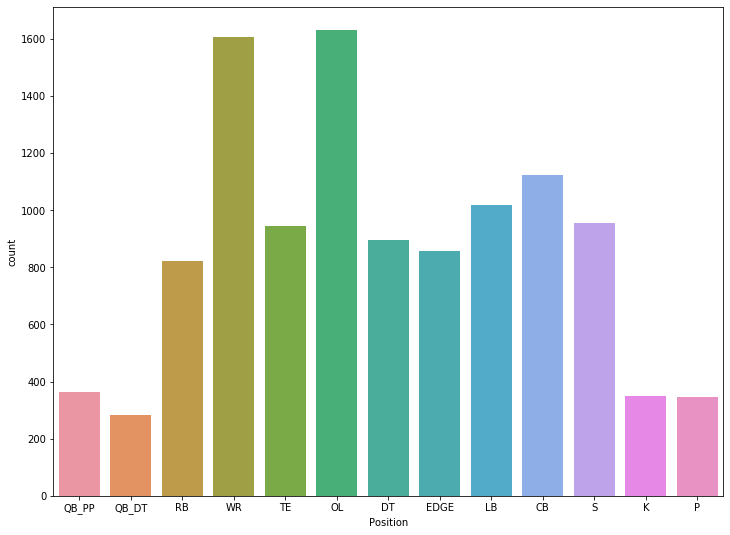

In [20]:
plt.figure(figsize=(12, 9))
sns.countplot(x="Position", data=players,
              order=["QB_PP", "QB_DT", "RB", "WR", "TE", "OL", "DT", "EDGE", "LB", "CB", "S", "K", "P"])

/home/zaned/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/zaned/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/zaned/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `ar

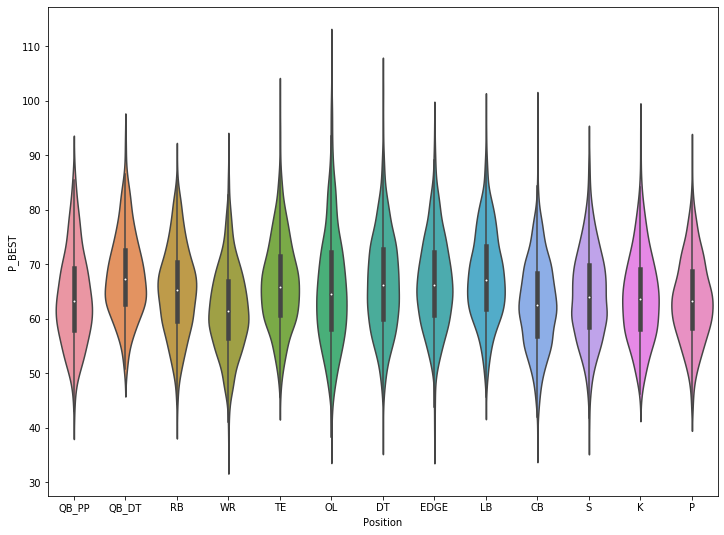

In [21]:
plt.figure(figsize=(12, 9))
sns.violinplot(x="Position", y="P_BEST", data=players,
              order=("QB_PP", "QB_DT", "RB", "WR", "TE", "OL", "DT", "EDGE", "LB", "CB", "S", "K", "P"))

# Assign Star Ratings

In [22]:
players["Stars"] = 2


players.loc[:120, ["Stars"]] = 5
players.loc[120 : 120+1300, "Stars"] = 4
players.loc[120+1300 : 120+1300+5600, "Stars"] = 3

In [23]:
players.groupby(["Position", "Stars"]).agg("count")[["P_BEST"]]

P_BEST
Position Stars        
CB       2         509
         3         539
         4          73
         5           2
DT       2         280
         3         462
         4         138
         5          16
EDGE     2         251
         3         464
         4         130
         5          11
K        2         140
         3         177
         4          31
         5           2
LB       2         242
         3         574
         4         185
         5          15
OL       2         634
         3         720
         4         224
         5          52
P        2         149
         3         172
         4          24
         5           1
QB_DT    2          56
         3         176
         4          49
         5           2
QB_PP    2         157
         3         163
         4          43
         5           1
RB       2         276
         3         446
         4          98
         5           1
S        2         379
         3         479
         4          89
         5           6
TE       2         276
         3         529
         4         131
         5           9
WR       2         820
         3         700
         4          85
         5           2

# Final Output

In [24]:
players = players.drop(columns=[c for c in players.columns if "P_" in c and c != "P_BEST"])
players.to_csv("players_evaluated.csv", index=False)
players

,First,Last,Height,Weight,T_Strength,T_Athleticism,T_Dexterity,T_IQ,T_Personality,T_Arm,T_Leg,S_ArmStr,S_ArmAccShort,S_ArmAccMed,S_ArmAccLong,S_ReadDefPass,S_ReadDefRun,S_Speed,S_Acceleration,S_Agility,S_RunPower,S_Vertical,S_Hands,S_RunBlock,S_PassBlock,S_TackApproach,S_TackBringDown,S_ShedBlockStr,S_ShedBlockAgl,S_CoverMan,S_CoverZone,S_ReadOff,S_KickPow,S_KickAcc,S_PuntPow,S_PuntAcc,Position,P_BEST,Stars
0,Andre,Brown,77.785520,370.251049,96.205956,38.034630,31.360394,33.230310,49.318560,43.095424,57.661666,56.877833,45.989783,46.900243,53.525262,43.029858,37.705419,32.679202,28.027047,30.929072,105.848221,61.143607,23.606471,107.220857,95.745225,20.360414,104.133021,101.496063,61.233102,27.743837,20.412964,46.534546,58.241582,71.410036,58.880498,65.581198,OL,108.370395,5
1,Alijah,Harris,76.678068,299.611678,90.896314,49.165386,29.255212,74.229956,43.171610,42.392602,31.882291,54.344179,47.269649,49.593264,50.696894,76.998251,58.670433,35.454747,36.951596,38.834763,94.264912,65.542291,37.283075,95.903131,102.425544,48.299834,100.546591,103.498327,76.069479,35.971820,39.100310,69.298571,39.977992,45.391858,42.082889,53.688686,DT,103.209994,5
2,Weston,Jackson,78.264296,344.850574,94.834343,34.736893,20.231105,57.028000,48.219405,31.305556,27.243676,46.153957,28.943530,43.492098,40.413910,65.173557,66.582370,31.945336,26.103752,28.225095,105.196119,56.206615,20.860606,97.591601,92.236884,24.962045,102.555990,105.050864,61.177790,21.015976,31.939744,58.903932,36.826000,37.802871,40.034481,36.233092,DT,102.063971,5
3,Michael,Finley,80.998230,370.025541,80.890109,28.750672,23.364785,22.856387,50.052748,65.370502,71.058188,68.341860,56.944061,65.252538,70.052488,34.683598,33.558109,18.162986,19.460109,14.215436,81.615020,62.447107,25.321683,96.909787,93.138562,31.324144,82.758119,88.740515,42.235452,13.037233,10.914410,32.124837,72.085488,64.610865,74.140242,49.754739,OL,101.260238,5
4,Trevor,Kennedy,78.825032,337.558931,92.124447,29.626324,25.696194,41.070697,57.389817,46.083700,26.022951,54.681227,45.927812,44.526157,57.353677,53.321166,45.595390,21.529003,21.053098,15.231062,89.416213,51.061458,28.357048,98.939623,96.088044,22.803328,95.854613,101.476154,55.432346,16.218712,14.714851,45.194881,35.207365,28.020470,36.220736,34.622699,OL,101.244444,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11185,Alexander,Taylor,73.069718,192.576496,12.249627,41.622411,81.585046,51.615538,53.051356,17.944516,20.388536,26.548645,34.660337,35.974317,25.049401,54.945466,44.594322,31.514366,41.530870,37.456774,24.469441,32.733928,56.336480,31.248990,26.616618,28.496756,12.707977,14.949317,23.516610,41.799408,34.187713,54.973832,27.942084,36.691033,32.014368,42.943702,WR,38.044633,2
11186,Ryan,Anderson,73.656113,191.024157,32.852587,48.698064,52.321087,44.950419,43.752979,33.823738,10.000000,37.448332,37.685134,40.054722,37.159139,44.072784,36.472548,39.187103,36.366967,37.988519,45.445078,48.802469,37.279026,36.539558,40.940309,31.763980,43.201649,45.204085,39.302497,44.227441,34.763894,49.772971,22.623272,31.602734,24.885373,45.944774,EDGE,37.891980,2
11187,Jose,Taylor,70.901010,198.336853,26.064285,44.826046,63.228263,55.632430,51.818022,15.915664,25.291675,23.075531,28.996898,31.918142,26.957751,53.402389,44.037631,32.612258,34.039576,39.538024,31.495949,33.698285,60.258069,32.015485,29.453723,28.895236,34.103761,27.449765,22.154298,41.209681,34.453226,57.518376,31.744278,35.300399,30.615332,34.370216,CB,37.792024,2
11188,Samuel,Thomas,68.701204,180.990665,29.245085,45.252424,39.528950,57.416118,56.859141,29.006325,25.991674,37.667543,29.916696,35.121832,36.622816,50.074976,62.572755,34.594530,32.893524,30.022734,34.109982,22.348989,45.957399,38.981696,37.073976,41.774340,32.528257,40.642559,19.137806,39.708826,45.571139,46.454614,36.112015,28.538593,38.431084,33.396506,CB,37.639566,2
